Epoch 1/50
352/352 [==============================] - 13s 11ms/step - loss: 6.7472 - accuracy: 0.1957 - val_loss: 1.9941 - val_accuracy: 0.2716
Epoch 2/50
352/352 [==============================] - 4s 10ms/step - loss: 1.9402 - accuracy: 0.2933 - val_loss: 2.0234 - val_accuracy: 0.2740
Epoch 3/50
352/352 [==============================] - 4s 11ms/step - loss: 1.8572 - accuracy: 0.3281 - val_loss: 1.9231 - val_accuracy: 0.3060
Epoch 4/50
352/352 [==============================] - 4s 10ms/step - loss: 1.8071 - accuracy: 0.3510 - val_loss: 1.9082 - val_accuracy: 0.3218
Epoch 5/50
352/352 [==============================] - 4s 10ms/step - loss: 1.7645 - accuracy: 0.3661 - val_loss: 1.8555 - val_accuracy: 0.3388
Epoch 6/50
352/352 [==============================] - 4s 11ms/step - loss: 1.7286 - accuracy: 0.3775 - val_loss: 1.7490 - val_accuracy: 0.3688
Epoch 7/50
352/352 [==============================] - 4s 10ms/step - loss: 1.6912 - accuracy: 0.3908 - val_loss: 1.7996 - val_accuracy: 0.353

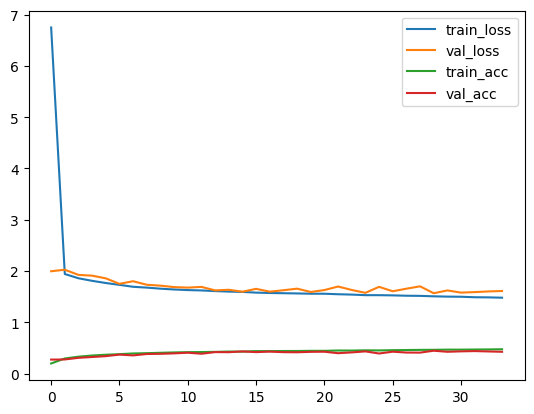

Test loss: 1.5922620296478271
Test accuracy: 0.4325999915599823


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 超参数
lr = 0.001 # 学习率
batch_size = 128 # 批量大小
num_epochs = 50 # 训练的迭代次数

# 加载数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 构建模型
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3))) # 输入层
for i in range(20): # 20个隐藏层
    model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal')) # 初始化方法为He
    model.add(tf.keras.layers.ELU(alpha=1.0)) # 激活函数为ELU
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) # 输出层，用softmax进行多类别分类

# 编译模型
optimizer = tf.keras.optimizers.Nadam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 训练模型
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.1, callbacks=[early_stopping])

# 绘制学习曲线
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)



Epoch 1/50
352/352 [==============================] - 29s 28ms/step - loss: 1.7564 - accuracy: 0.3722 - val_loss: 2.1397 - val_accuracy: 0.3024
Epoch 2/50
352/352 [==============================] - 9s 27ms/step - loss: 1.5460 - accuracy: 0.4494 - val_loss: 1.6226 - val_accuracy: 0.4212
Epoch 3/50
352/352 [==============================] - 9s 27ms/step - loss: 1.4622 - accuracy: 0.4795 - val_loss: 1.9371 - val_accuracy: 0.3724
Epoch 4/50
352/352 [==============================] - 10s 27ms/step - loss: 1.4035 - accuracy: 0.5008 - val_loss: 1.5626 - val_accuracy: 0.4510
Epoch 5/50
352/352 [==============================] - 9s 25ms/step - loss: 1.3570 - accuracy: 0.5172 - val_loss: 1.6237 - val_accuracy: 0.4398
Epoch 6/50
352/352 [==============================] - 10s 27ms/step - loss: 1.3100 - accuracy: 0.5361 - val_loss: 1.6110 - val_accuracy: 0.4440
Epoch 7/50
352/352 [==============================] - 9s 26ms/step - loss: 1.2759 - accuracy: 0.5479 - val_loss: 1.6485 - val_accuracy: 0.4

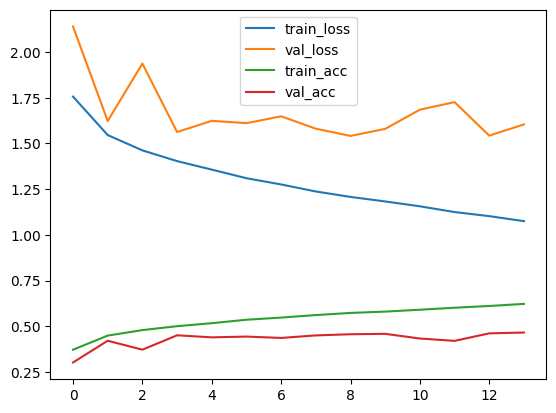

Test loss: 1.6322946548461914
Test accuracy: 0.4602999985218048


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 超参数
lr = 0.001 # 学习率
batch_size = 128 # 批量大小
num_epochs = 50 # 训练的迭代次数

# 加载数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 构建模型
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3))) # 输入层
for i in range(20): # 20个隐藏层
    model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal')) # 初始化方法为He
    model.add(tf.keras.layers.BatchNormalization()) # 批量归一化
    model.add(tf.keras.layers.ELU(alpha=1.0)) # 激活函数为ELU
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) # 输出层，用softmax进行多类别分类

# 编译模型
optimizer = tf.keras.optimizers.Nadam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 训练模型
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.1, callbacks=[early_stopping])

# 绘制学习曲线
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


尝试用SELU替换批量归一化，并进行必要的调整以确保网络是自归一化的话。即归一化输入特征，使用leCUN正态初始化

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K

# 超参数
learning_rate = 0.001 # 学习率
batch_size = 128 # 批量大小
num_epochs = 50 # 训练的迭代次数

# 加载数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
y_train = to_categorical(y_train, num_classes).reshape(-1, num_classes)
y_test = to_categorical(y_test, num_classes).reshape(-1, num_classes)

# 构建模型
model = tf.keras.models.Sequential()

# 归一化输入
model.add(tf.keras.layers.Lambda(lambda x: x / 255.0 - 0.5, input_shape=(32, 32, 3)))

# 隐藏层
for i in range(20):
  model.add(Dense(units=100, kernel_initializer='lecun_normal', activation='selu'))

  # 确保网络是自归一化的
  model.add(tf.keras.layers.AlphaDropout(rate=1 - 1.0/K.int_shape(model.layers[-1].output)[1]))

# 输出层
model.add(Dense(units=num_classes, activation='softmax'))

# 编译模型
optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 训练模型
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.1, callbacks=[early_stopping])

# 绘制学习曲线
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/50


ValueError: ignored

Epoch 1/50
352/352 [==============================] - 15s 14ms/step - loss: 2.7121 - accuracy: 0.0996 - val_loss: 3483.4561 - val_accuracy: 0.1064
Epoch 2/50
352/352 [==============================] - 4s 13ms/step - loss: 2.3438 - accuracy: 0.1007 - val_loss: 9092.1260 - val_accuracy: 0.0986
Epoch 3/50
352/352 [==============================] - 4s 12ms/step - loss: 2.2975 - accuracy: 0.1100 - val_loss: 114092.5469 - val_accuracy: 0.1064
Epoch 4/50
352/352 [==============================] - 4s 13ms/step - loss: 2.2418 - accuracy: 0.1388 - val_loss: 73603.0156 - val_accuracy: 0.1024
Epoch 5/50
352/352 [==============================] - 4s 12ms/step - loss: 2.1977 - accuracy: 0.1519 - val_loss: 39513.4180 - val_accuracy: 0.1064
Epoch 6/50
352/352 [==============================] - 4s 12ms/step - loss: 2.1711 - accuracy: 0.1576 - val_loss: 63883.7500 - val_accuracy: 0.1064
Epoch 6: early stopping


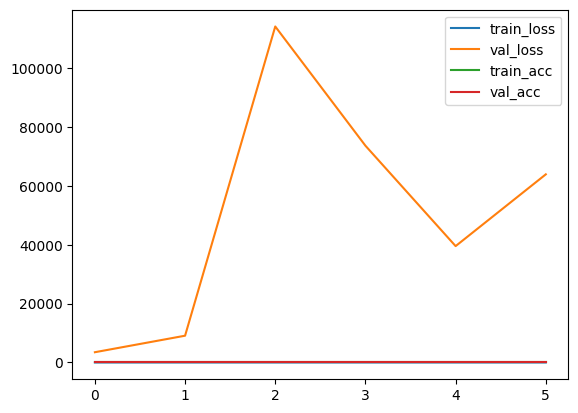

Test loss: 62371.37109375
Test accuracy: 0.10000000149011612


In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 超参数
lr = 0.001 # 学习率
batch_size = 128 # 批量大小
num_epochs = 50 # 训练的迭代次数

# 加载数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 构建模型
model = tf.keras.models.Sequential()

# 输入层
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

# 20个隐藏层，使用Alpha Dropout来正则化
for i in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal')) # 初始化方法为He
    model.add(tf.keras.layers.ELU(alpha=1.0)) # 激活函数为ELU
    model.add(tf.keras.layers.AlphaDropout(rate=0.5)) # 添加Dropout来正则化模型

# 输出层，用softmax进行多类别分类
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# 编译模型
optimizer = tf.keras.optimizers.Nadam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 训练模型
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.1, callbacks=[early_stopping])

# 绘制学习曲线
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
